<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S4_C1_LAB_Logistic_Regression_Part_1_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> Logistic Regression </h2>

## **Actividad 2**


---


## **Balance de clases**
El balance de las clases se refiere a la ***distribución*** de las clases en un conjunto de datos de clasificación.

Un conjunto de datos está ***balanceado ***cuando las diferentes clases tienen aproximadamente el mismo número de muestras. Si una clase tiene significativamente más ejemplos que otra, se dice que el conjunto de datos está ***desbalanceado.***

Por ejemplo, si estás clasificando si un examen fue aprobado o no, y el 90% de los estudiantes aprobaron mientras solo el 10% fallaron, el conjunto de datos está desbalanceado. Un modelo entrenado en un conjunto de datos desbalanceado tiende a estar sesgado hacia la clase mayoritaria (en este caso, los aprobados), lo que puede llevar a un mal rendimiento en la predicción de la clase minoritaria (los que fallaron).

### **¿Cómo manejarlo?**

**Aumentar la clase minoritaria (Oversampling):**

* SMOTE (Synthetic Minority Over-sampling Technique): Genera ejemplos sintéticos de la clase minoritaria combinando características de los datos existentes.
* Random Oversampling: Duplica aleatoriamente ejemplos de la clase minoritaria hasta que ambas clases tengan tamaños similares.

**Reducir la clase mayoritaria (Undersampling):**

* Random Undersampling: Reduce el tamaño de la clase mayoritaria eliminando ejemplos aleatoriamente hasta igualar el tamaño de la clase minoritaria.

**Recolección de más datos**

**Usar algoritmos adaptados a datos desbalanceados**

* Balanced Random Forest o Class-balanced loss functions

Data set:

* **Test_1:** Puntuación en el primer examen.
* **Test_2:** Puntuación en el segundo examen.
* **Results:** Resultado del examen (0 = Fallido, 1 = Aprobado).

### **Actividad 1. Cargue librerías y datos**
------

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [1]:
from pylab import rcParams
rcParams['figure.figsize'] = 5,3

### *Tareas A1*

* Cargue los datos 'Classification_Tests.csv' desde su carpeta de drive
* Muestre las 5 pirmeras columnas

In [3]:
# Cargue los datos, imprima las primeras filas
from google.colab import drive # Conectanonos con google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os    # la librería necesaria para la ruta de la carpeta
os.chdir('/content/drive/MyDrive/Colab Notebooks/BIT_Bootcam_IA/DataSET')

#mostar lista de archivos
os.listdir()

['marketing_campaign.csv',
 'marketing_campaign.xlsx',
 'marketing_extract_2X_Income.xlsx',
 'linear_regression_model (1).pkl',
 'poly_regression_model (1).pkl',
 'auto-mpg.names',
 'auto-mpg.data-original',
 'auto-mpg.data',
 'Index',
 'mpg-limpios-procesados.xlsx',
 'Classification_Tests.csv']

In [5]:
df = pd.read_csv('Classification_Tests.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Test_1   100 non-null    float64
 1   Test_2   100 non-null    float64
 2   Results  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


### **Actividad 2. Descripción del data set**
------

### *Tareas A2*

* Describa los datos (Atributos, registros, rangos, distribuciones)
* ¿Debe aplicar alguna técnica de limpieza?



Este DataFrame tiene las siguientes características:

Número de registros (filas): 100

El DataFrame contiene 100 entradas o filas, numeradas de 0 a 99.
Atributos (columnas): 3

Test_1: Tiene 100 valores no nulos y está representado por el tipo de datos float64, que indica números decimales.
Test_2: Similar a Test_1, contiene 100 valores no nulos de tipo float64.
Results: Tiene 100 valores no nulos y está representado por el tipo de datos int64, lo que sugiere que almacena números enteros.
* Rangos:
De Test_1 y Test_2 son de tipo float64 que van desde 30.058822 hasta 99.827858
y de result desde el 0 al/y uno

al revisar los graficos, no se presentan outliers porque los datos de las columnas Test_1 y Test_2 tienen los datos myu dispersos ( poco concentrados), ademas de que no hay datos nulos dentro de sus celdas

In [ ]:
df.describe()

,Test_1,Test_2,Results
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


<ipython-input-9-cbf9c52a722d>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


<Axes: xlabel='Test_2'>

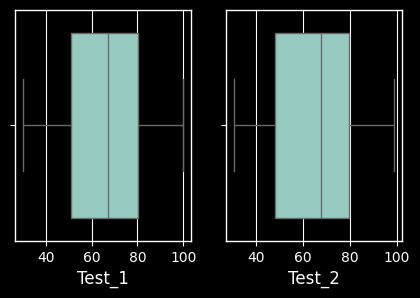

In [9]:
plt.figure(figsize=(5,3,))
plt.style.use('dark_background')
sns.boxplot(x=df['Test_1'])
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Test_1'])

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Test_2'])

In [ ]:
df.head(10)

,Test_1,Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


### *Tareas A2*

* Realice un diagrama de barras al target (concluya respecto al balance de las clases)

#target= objetivo:

* representa que las colunnas anteriores son condiciones que si o si se deben cumplir para hallar un resultado, en este caso al tener presente el valor de la columna Test_1 y Test_2 ppodemos saber el valor de la columna Result
* tambien hay que aclarar que los valores de result varian en 0 y 1 , lo que significa que son enteros qusirven para la comparativa tipo "booleano"

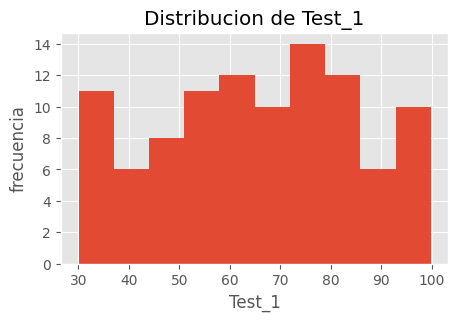

In [ ]:
plt.figure(figsize=(5,3))
df['Test_1'].hist()
plt.title('Distribucion de Test_1')
plt.xlabel('Test_1')
plt.ylabel('frecuencia')
plt.show()

* Del grafico podemos deducir que las calificaciones estan en el eje(x)
* la cantidad de veces que se repite una calificacion estan en el eje(y)

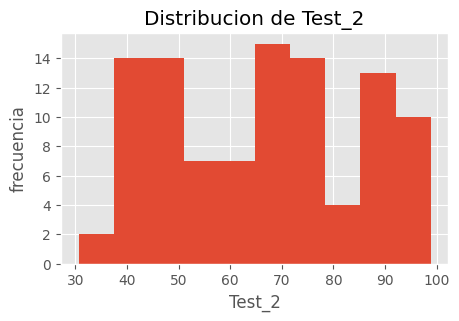

In [ ]:
plt.figure(figsize=(5,3))
df['Test_2'].hist()
plt.title('Distribucion de Test_2')
plt.xlabel('Test_2')
plt.ylabel('frecuencia')
plt.show()

este codigo **resultado_Test1 = df['Results'][df['Test_1'] > 85]**
* esta generando una variable resultado_Test1 =
* del df vamos a seleccionar la colunna Result
* de la colunna test vamos a revisar las **filas** que tienen valores mayores que 85 [df['Test_1'] > 85]
# se concluye que las filas que en la columna tiene valores mayores que 85 se mostrara el valor de Resul de la fila correspondiente

In [ ]:
resultado_Test1 = df['Results'][df['Test_1'] > 85]
resultado_Test1

,Results
10,0
21,1
27,0
31,1
42,1
47,1
49,1
51,1
52,1
56,1


In [ ]:
df.head(11)

,Test_1,Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


este codigo **class_counts = df['Results'].value_counts()
class_counts.plot(kind='bar')**
* class_counts-- variable
* df['Results']--- columna de consulta
* **value_counts()**
 * Este método cuenta cuántas veces aparece cada valor **único** en la columna "Results". en este caso (0,1)
 * El resultado es una Serie de pandas, donde el **índice (posibles resultados)* son los valores únicos de la columna y los valores son las frecuencias de esos valores.
* class_counts.plot-- funcion de matplotlib ejecutada a la variable class_counts para generar un grafico
*  El **argumento** kind='bar' -----indica que se desea un gráfico de barras.
   * Esto significa que se generará un gráfico donde el eje (x) representará las diferentes clases (valores únicos en "Results")
 * el eje (y) mostrará el número de ocurrencias de cada clase.

#esta formula saca las clases(valores unicos que se repiten) de Result y las contabiliza haciendo una comparativa que se muestran en un grafico

<Axes: xlabel='Results'>

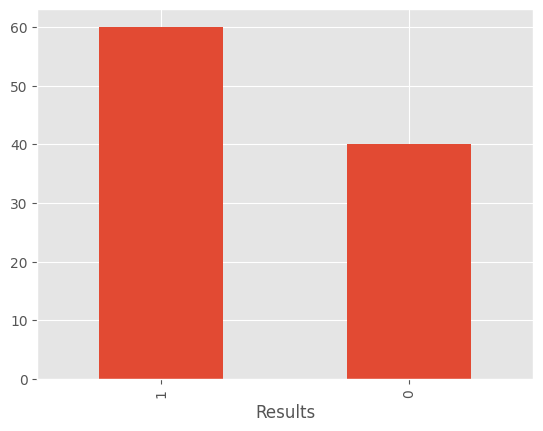

In [ ]:
class_counts = df['Results'].value_counts()
class_counts.plot(kind='bar')


### **Actividad 3: Construya un diagrama de las clases de data set**
---

### *Tareas A3*

Las siguientes líneas de código grafican el diagrama de dispersión (scatter) de los datos de los que no aprobaron

* Ingresa la línea de código para que gráfique la clase que si aprobó con un triangulo verde
*  Complete los títulos de la gra´fica y los ejes

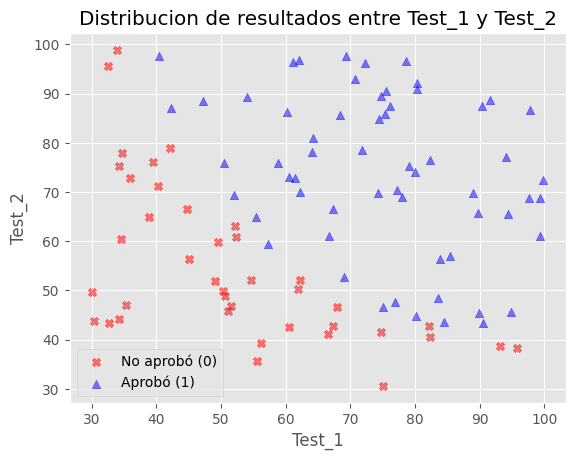

In [ ]:
target = df['Results']

plt.scatter(df['Test_1'][target == 0], df['Test_2'][target== 0], alpha=0.5, label='No aprobó (0)', marker='X', color='red')
plt.scatter(df['Test_1'][target == 1], df['Test_2'][target== 1], alpha=0.5, label='Aprobó (1)', marker='^', color='blue')
### Inserte la línea de código

plt.title('Distribucion de resultados entre Test_1 y Test_2')
plt.xlabel('Test_1')
plt.ylabel('Test_2')
plt.legend()
plt.grid(True)
plt.show()

### **Actividad 4: Defina una función para calcular la función sigmoid**
---

$$ h(z) = \frac{1}{1+e^{-z}}$$

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:


# Definición de la función sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Lista de valores a probar
x_values = [-10, -5, 0, 5, 10]

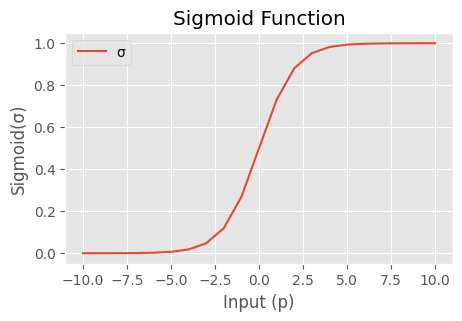

In [ ]:
# Create a set of input values between -10 and 10
p = np.linspace(-10, 10, 21)

# Apply the sigmoid function to each value in p
sig = 1 / (1 + np.exp(-p))

# Creating the plot
plt.figure(figsize=(5,3))
plt.plot(p, sig)
plt.xlabel('Input (p)')
plt.ylabel('Sigmoid(σ)')
plt.title('Sigmoid Function')
plt.legend('σ(x)')

# Display the plot
plt.show()

### *Tareas A4*

En clases pasadas desarrollamos la función de para en cálculo de la sigmoid

* Copia la función y grafica en un rango de -10 a 10
* Describa la función sigmoid
* Cuál es el rango de la función sigmoid? Es decir en qué valores existe la función?

### Actividad 5: Cálculo de la función de costos $J(\theta)$
---

El objetivo de la regresión log´stica es minimizar la función de costo

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

donde el gradiente de la función de costo está dado por

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

### *Tareas A5*

* Contruya una función para calcular la función de costo
* Construya una gráfica con plot(h,y) para graficar la función de costo.
1. Genere un vector de datos con todos los posibles valores de h
2. Grafique un plot cuando  y = 0
3. Grafique un plot cuando  y = 1

* Concluya

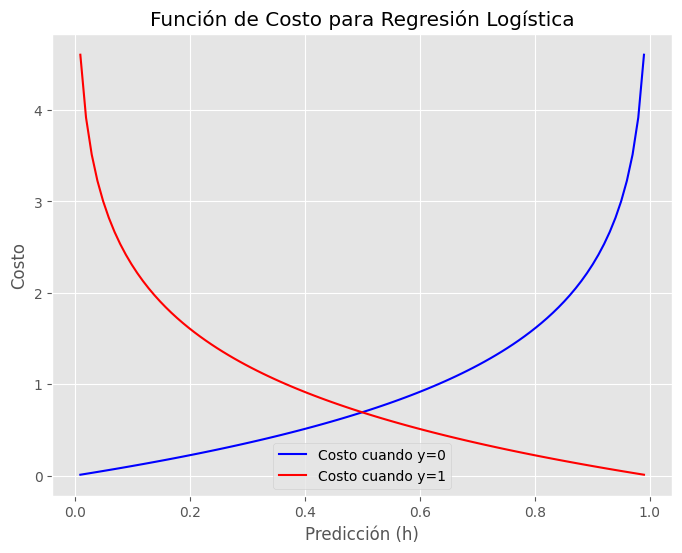

In [ ]:
# Definir la función de costo para logistic regression
def cost_function(h, y):
    return -y * np.log(h) - (1 - y) * np.log(1 - h)

# Crear valores de h (predicción) desde casi 0 hasta casi 1
h_values = np.linspace(0.01, 0.99, 100)

# Calcular el costo para y=0 y y=1
cost_for_y0 = cost_function(h_values, 0)
cost_for_y1 = cost_function(h_values, 1)

# Graficar las funciones de costo
plt.figure(figsize=(8, 6))
plt.plot(h_values, cost_for_y0, label='Costo cuando y=0', color='blue')
plt.plot(h_values, cost_for_y1, label='Costo cuando y=1', color='red')
plt.xlabel('Predicción (h)')
plt.ylabel('Costo')
plt.title('Función de Costo para Regresión Logística')
plt.legend()